# <font color = 'Orange'> Kaggle dataset visualization</font>



In [2]:
import pandas as pd
#add the files on your Google Drive or change the path for the training and testing dataset
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train = train.drop(['case_id'], axis=1)
test = test.drop(['case_id'], axis=1)
train['dataset'] = 'train' 
test['dataset'] = 'test'
df = pd.concat([train, test])

In [3]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   Hospital_type_code                 455495 non-null  object 
 2   City_Code_Hospital                 455495 non-null  int64  
 3   Hospital_region_code               455495 non-null  object 
 4   Available Extra Rooms in Hospital  455495 non-null  int64  
 5   Department                         455495 non-null  object 
 6   Ward_Type                          455495 non-null  object 
 7   Ward_Facility_Code                 455495 non-null  object 
 8   Bed Grade                          455347 non-null  float64
 9   patientid                          455495 non-null  int64  
 10  City_Code_Patient                  448806 non-null  float64
 11  Type of Admission                  455495 no

Hospital_type_code
a    204730
b     98884
c     66147
e     35428
d     29048
f     15252
g      6006
Name: count, dtype: int64

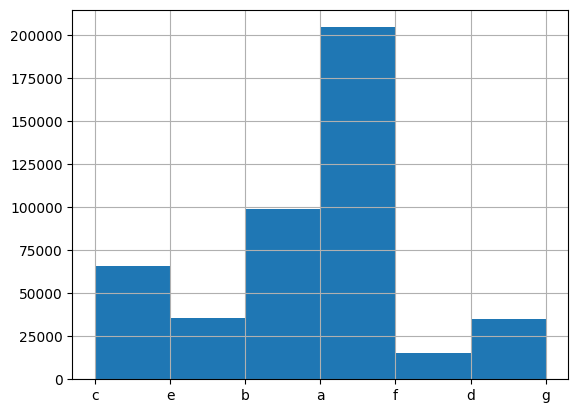

In [ ]:
df['Hospital_type_code'].hist(bins = 6) ; # visualize the distribution of hospital types
df['Hospital_type_code'].value_counts() # count the number of occurrences of each hospital type


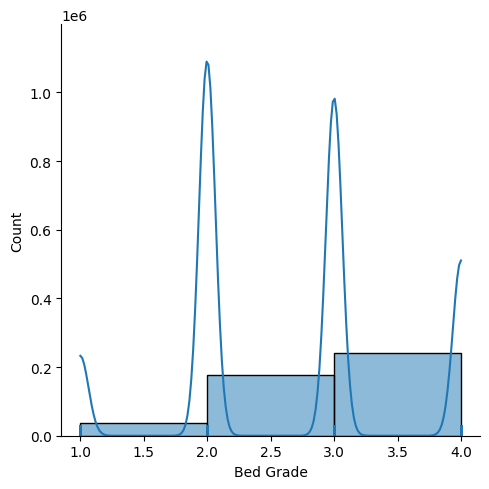

In [ ]:
import seaborn as sns
line_up=sns.displot(df['Bed Grade'], bins=3, kde=True, rug=True)


In [ ]:
ds = df.groupby(['Department','Bed Grade'])['patientid'].count().reset_index() #grouping by Department and Bed Grade to count patients
ds.columns = ['Department','Bed Grade', 'count']

In [ ]:
ds.head()

,Department,Bed Grade,count
0,TB & Chest disease,1.0,773
1,TB & Chest disease,2.0,4880
2,TB & Chest disease,3.0,5151
3,TB & Chest disease,4.0,2944
4,anesthesia,1.0,452


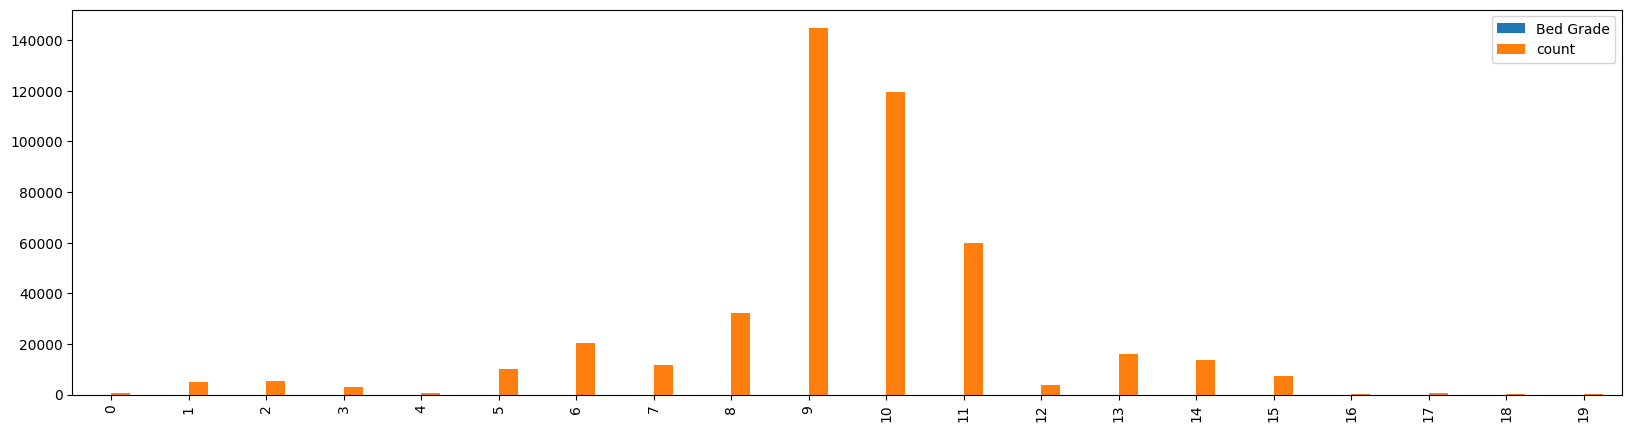

In [ ]:
ds.plot.bar(figsize=(20,5)); #

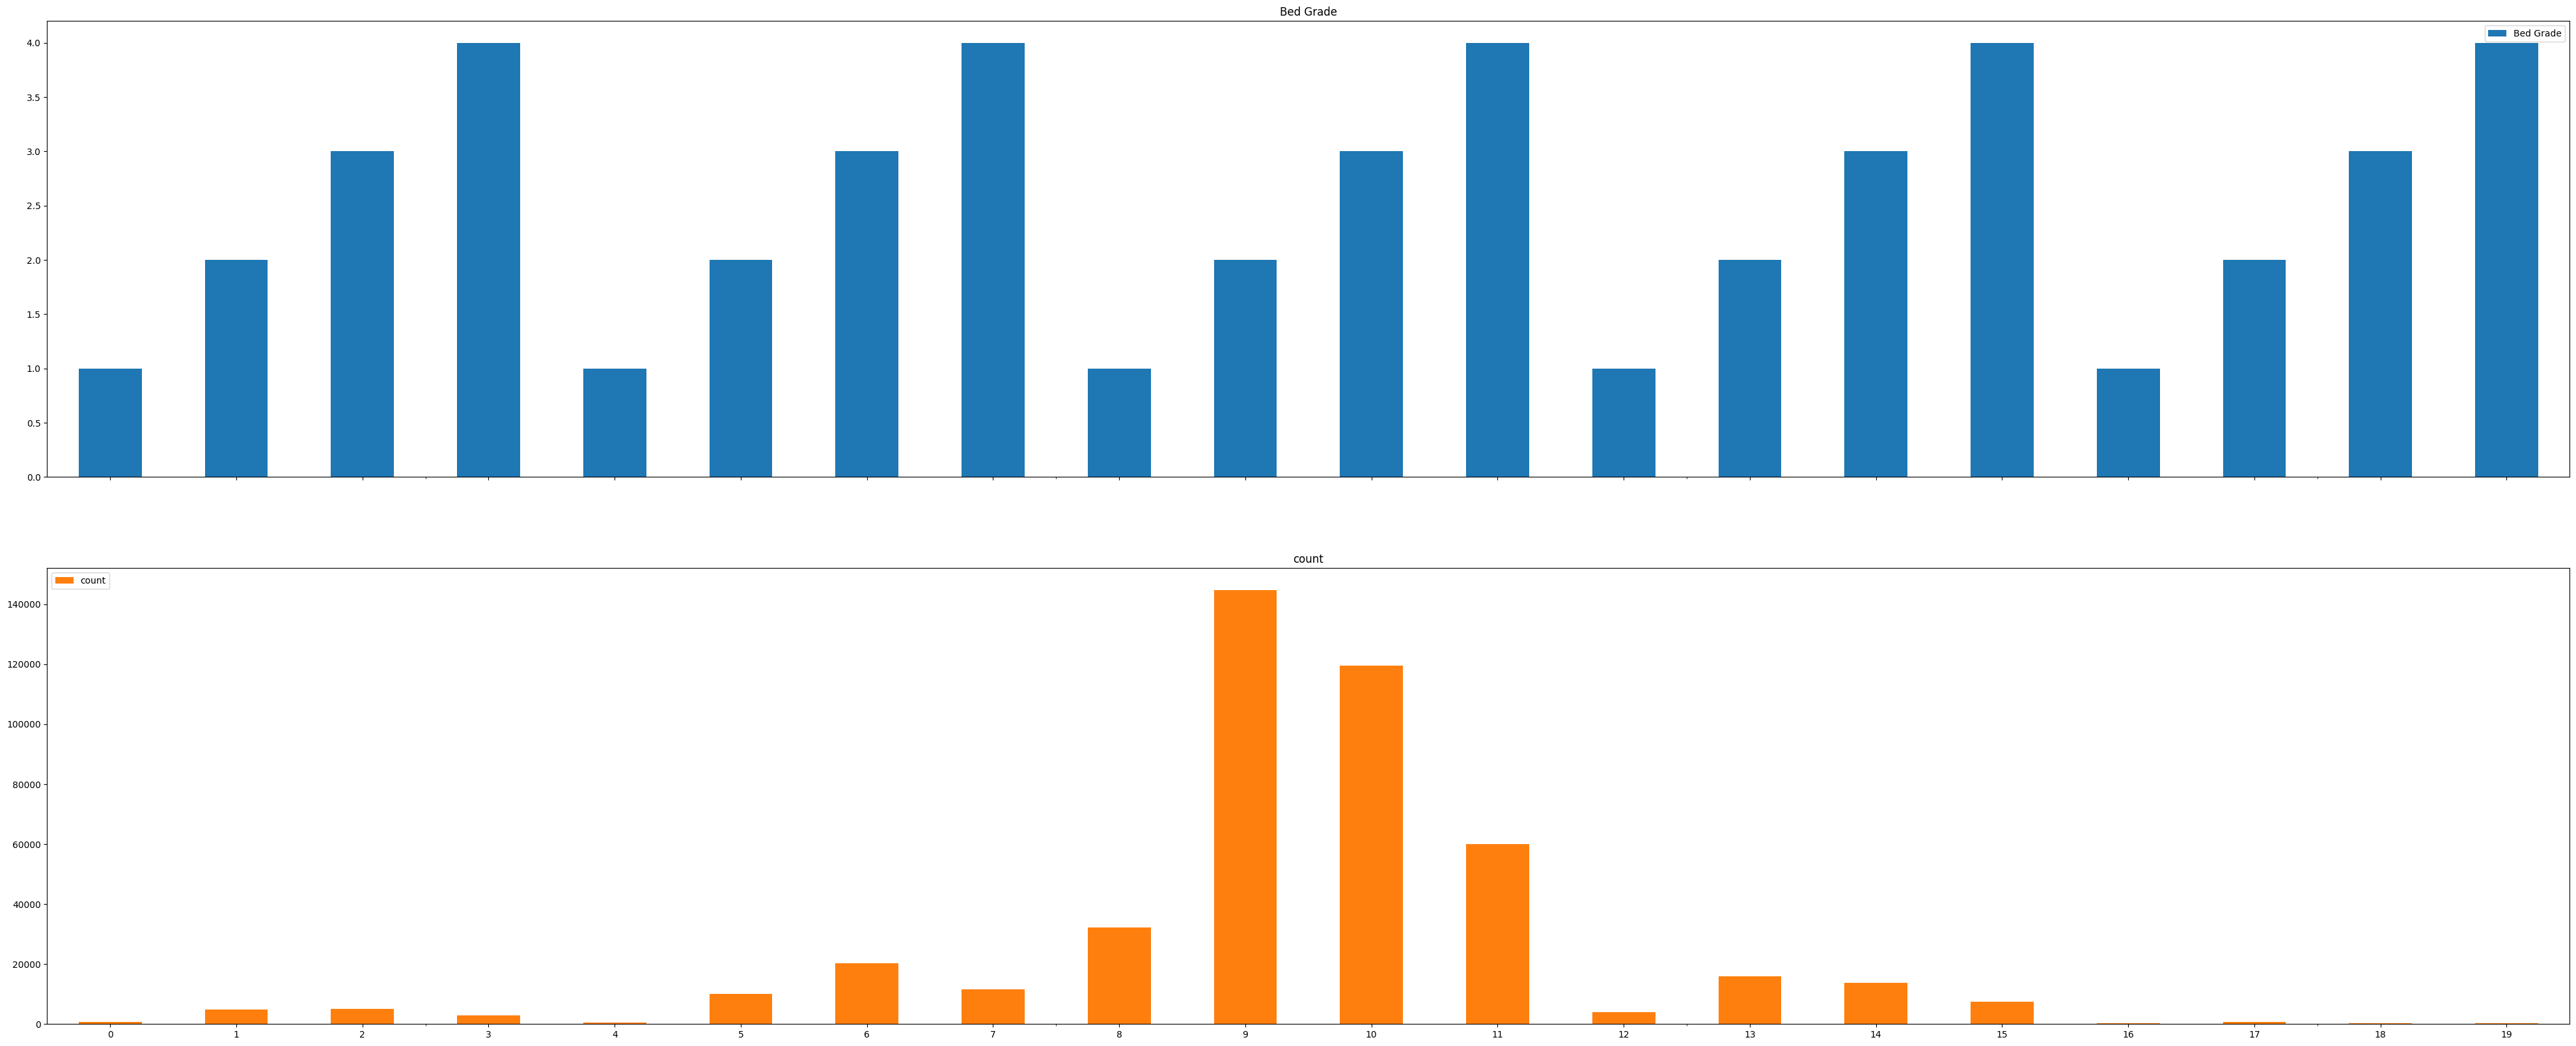

In [ ]:
axes = ds.plot.bar(rot=0, subplots=True,figsize=(50,20)) # this will create a bar plot for each department and bed grade
axes[1].legend(loc=2)

<Axes: >

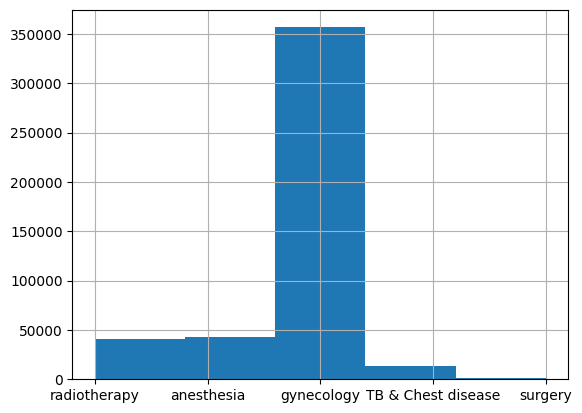

In [ ]:
df['Department'].hist(bins=5) # visualize the distribution of departments

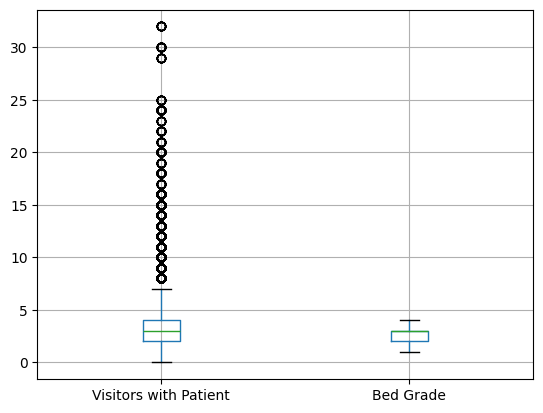

In [ ]:
boxplot = df.boxplot(column=['Visitors with Patient', 'Bed Grade']) # create a boxplot for Visitors with Patient and Bed Grade to visualize their distribution

In [ ]:
ds = df.groupby(['Department','Age'])['patientid'].count().reset_index()
ds.columns = ['Department','Age', 'count']

In [ ]:
ds.head()

,Department,Age,count
0,TB & Chest disease,0-10,602
1,TB & Chest disease,11-20,998
2,TB & Chest disease,21-30,1809
3,TB & Chest disease,31-40,2144
4,TB & Chest disease,41-50,2470


In [7]:
ds = df.groupby(['Age','dataset'])['patientid'].count().reset_index()
ds.columns = ['Age','dataset', 'count']

In [8]:
ds.head()

,Age,dataset,count
0,0-10,test,2886
1,0-10,train,6254
2,11-20,test,7103
3,11-20,train,16768
4,21-30,test,17717
